В этом задании мы должны научить машину понимать тексты. В файле recs.txt находятся отзывы о разных фильмах. Наша модель машинного обучения должна проанализировать отзыв и ответить на простой вопрос: понравился ли пользователю просмотренный фильм.

Подключите необходимые для работы пакеты: pandas as pd, numpy as np, nltk, re, все функции из sklearn

In [1]:
import pandas as pd
import numpy as np
import nltk
import re
import sklearn as sk
import matplotlib.pyplot as plt
from tqdm import tqdm

Увеличьте ширину выводимой информации в DataFrame (на это понадобится для показа текстов отзывав):
pd.set_option('max_colwidth',600)

In [2]:
pd.set_option('max_colwidth',600)

Прочтите данные из файла recs.txt, в качестве разделителя (параметр sep) там выступает строка "\\-\\-\\|\\|\\|\\-\\-", кодировка (параметр encoding) - 'utf-8'.

Выведите три первых строки таблицы. Какое отношение (Sentiment) у авторов отзывов к просмотренным фильмам?

In [3]:
data = pd.read_csv('recs.txt',sep = "\-\-\|\|\|\-\-",encoding = 'utf-8')
data.columns

c:\python 3.7.7\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


Index(['Sentiment', 'URL', 'Text'], dtype='object')

Чтобы преобразовать тексты в наборы признаков методом bag-of-words мы должны сначала профильтровать текст, оставив только значащие слова. Скачайте из корпуса набор незначащих слов для фильтрации командой nltk.download()  (в появившемся окне вкладка Corpora, пункт stopwords). 

In [4]:
#nltk.download()

Импортируйте список незначащих слов командами 
```python
from nltk.corpus import stopwords
stopwords = set(stopwords.words("russian"))
```
и выведите его на экран.

In [5]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words("russian"))
stopwords

{'а',
 'без',
 'более',
 'больше',
 'будет',
 'будто',
 'бы',
 'был',
 'была',
 'были',
 'было',
 'быть',
 'в',
 'вам',
 'вас',
 'вдруг',
 'ведь',
 'во',
 'вот',
 'впрочем',
 'все',
 'всегда',
 'всего',
 'всех',
 'всю',
 'вы',
 'где',
 'да',
 'даже',
 'два',
 'для',
 'до',
 'другой',
 'его',
 'ее',
 'ей',
 'ему',
 'если',
 'есть',
 'еще',
 'ж',
 'же',
 'за',
 'зачем',
 'здесь',
 'и',
 'из',
 'или',
 'им',
 'иногда',
 'их',
 'к',
 'как',
 'какая',
 'какой',
 'когда',
 'конечно',
 'кто',
 'куда',
 'ли',
 'лучше',
 'между',
 'меня',
 'мне',
 'много',
 'может',
 'можно',
 'мой',
 'моя',
 'мы',
 'на',
 'над',
 'надо',
 'наконец',
 'нас',
 'не',
 'него',
 'нее',
 'ней',
 'нельзя',
 'нет',
 'ни',
 'нибудь',
 'никогда',
 'ним',
 'них',
 'ничего',
 'но',
 'ну',
 'о',
 'об',
 'один',
 'он',
 'она',
 'они',
 'опять',
 'от',
 'перед',
 'по',
 'под',
 'после',
 'потом',
 'потому',
 'почти',
 'при',
 'про',
 'раз',
 'разве',
 'с',
 'сам',
 'свою',
 'себе',
 'себя',
 'сейчас',
 'со',
 'совсем',
 'так

Определите функцию фильтрации текста:
```python
def review_to_words( review_text ):
    review_text = review_text.replace('ё','е')
    review_text = review_text.replace('Ё','Е')
    # 1. Удаляем все, кроме букв
    letters_only = re.sub("[^а-яА-Я]", " ", review_text) 
    # 2. Делаем все буквы строчными и создаем массив слов
    words = letters_only.lower().split()                             
    # 3. Удаляем незначащие слова
    meaningful_words = [w for w in words if not w in stopwords]
    # 4. Формируем текст, объединяя слова через пробел
    return( " ".join( meaningful_words ))
```

In [6]:
def review_to_words( review_text ):
    review_text = review_text.replace('ё','е')
    review_text = review_text.replace('Ё','Е')
    # 1. Удаляем все, кроме букв
    letters_only = re.sub("[^а-яА-Я]", " ", review_text) 
    # 2. Делаем все буквы строчными и создаем массив слов
    words = letters_only.lower().split()                             
    # 3. Удаляем незначащие слова
    meaningful_words = [w for w in words if not w in stopwords]
    # 4. Формируем текст, объединяя слова через пробел
    return( " ".join( meaningful_words ))

Скопируйте базу данных отзывов с помощью метода copy() в новую переменную и примените к отзывам функцию фильтрации: .apply(lambda s: review_to_words(s)).

Выведите на экран первые три строчки преобразованной базы данных

In [7]:
data_new = data.copy()
data_new['Text'] = data_new['Text'].apply(lambda s: review_to_words(s))

In [8]:
data_new

,Sentiment,URL,Text
0,-1,kinopoisk.ru/user/72383/comment/846161/,самых первых титрах появилось абсолютно твердое непоколебимое ощущение смотрю совершено детский фильм духе детей шпионов иначе объяснить наличие начальных титрах техно музыки огромнейшего просто колоссальнейшего наличия компьютерной графики уровня приставок фирмы детству удосужился сыграть видео игру мотивам мультфильма король лев адаптированную специально платформера прекрасно поймет полноты картины хватает мангуста димона который выдал камеру памятное хотя данном фильме фильму подошло сидишь неволей думаешь попал фильм адресованный поколению ясельной группы детского сада сюжет большему с...
1,1,kinopoisk.ru/user/697175/comment/805374/,знаете неожиданно хороший фильм большой любитель фильмов такого жанра очень понравился ожидала придраться сильно хотелось это сделать чему сюжет необычный непривычный оригинальный оторваться просмотра практически невозможно весь фильм проходит движении вечно случается открываются какие тайны всевозможные неожиданные повороты напряженные моменты сказала начнете смотреть фильм остановиться сможете примеру просто смогла оторваться практически прилипла экрану персонажи замечательные помощи актеров которых подобрали ким бейсингер просто шикарна хотя видеть роли жертвы очень непривычно равно здо...
2,1,kinopoisk.ru/user/1335875/comment/2079675/,фильм покажут угадать заочно достаточно посмотреть постер прочесть название однако решил ввязаться просмотр принципе могу сказать жалею времени потраченного это кино это выдающаяся картина увлекательно посмотреть приятных глазу актеров временами смешно это мелодрама элементами комедии любовная комедия комедия девичьим уклоном однако думаю парням посмотреть дебюте вообще главные герои занимаются сексом везде каждом месте словно слетевшие катушек эштон кутчер актер который никак профессионал сформироваться моем сознании часто картины номинируются золотую малину эффект бабочки всякий заставля...
3,1,kinopoisk.ru/user/457051/comment/567227/,брайан можешь бегать парижу разрушать подряд жак клод разрушу эйфелеву башню понадобится картина повествует шпионе отставнике брайане милсе лайам нисон перебравшимся лос анджелес дабы поближе летней дочери большую часть взросления которой пропустил работы эта самая дочь заявляет папе летит школьные каникулы париж действительно летит несмотря тщетные отговоры отца прилетает похищается злыми дядями довольно оперативно папаша выясняет свои связи собственно времени потерять дочь конец часов вдохнув поглубже летит выручку незадачливому чаду пьеру морелю крупно повезло дело фильмов схожим сюжетн...
4,1,kinopoisk.ru/user/1287480/comment/1157879/,режиссерская карьера неопытного летнего томаса яна началась встречи тилем швайгером книжном магазине кельна которым начал разрабатывать сценарий будущого проекта интересно определенную помощь режисеру предоставил квентин тарантино который консультировал яна некоторых аспектах создания картины ян дебютировал режиссерском амплуа картиной достучаться небес которая влюбила зрителей всему миру вскоре завоевала статус культового фильма однако сожалению успех фильма томас ян смог повторить последующие фильмы режиссера основном терпели неудачу позднее сосредоточился постановке рекламных роликов фи...
...,...,...,...
99995,1,kinopoisk.ru/user/1373506/comment/1093810/,собирался смотреть фильм преследовал одну цель убить время ожидал банальную американскую молодежную комедию огромным количеством тупых шуток секс просмотра приятно удивлен сюжету девушка имени олив обычная ученица пускает слух яко лишилась девственности слух быстро приобретает больших масштабов причем работая принципу испорченного телефона вся школа считает олив проституткой стажем девушка должна делать вернуть честное имя особо писать хочется этому фильму поэтому постараюсь сказать кратко фильме своего жанра совершенно нету слабым мест актерской игре никаких вопросов эмма стоун сыгравшая ...
99996,-1,kinopoisk.ru/user/2404686/comment/2168278/,доктор дед пихто клоун сей сбежа

Запустите преобразователь текстового признака в «bag of words» с помощью класса CountVectorizer библиотеки sklearn.feature_extraction.text. 

В конструкторе класса укажите параметры: analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None, max_features = 50000, binary = True

Вызовите метод обучения (построения словаря) и преобразования текстов: fit_transform. Результат присвойте новой переменной bagOfWords.

Сохраните порядок слов в словаре (метод .get_feature_names()) в переменную vocabulary.

In [9]:
count_vectorizer = sk.feature_extraction.text.CountVectorizer('recs.txt',analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None, max_features = 50000,binary = True)

c:\python 3.7.7\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass input=recs.txt as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [10]:
bag_of_words = count_vectorizer.fit_transform(data_new['Text'])
bag_of_words

<100000x50000 sparse matrix of type '<class 'numpy.int64'>'
	with 16553366 stored elements in Compressed Sparse Row format>

In [11]:
vocabulary = count_vectorizer.get_feature_names()
vocabulary

['ааа',
 'аанг',
 'аанга',
 'аанге',
 'аарон',
 'аарона',
 'абдулов',
 'абзац',
 'абзаца',
 'абзаце',
 'аборигенов',
 'аборигены',
 'аборт',
 'абрамс',
 'абрамса',
 'абрахам',
 'абсолют',
 'абсолюта',
 'абсолютная',
 'абсолютно',
 'абсолютного',
 'абсолютное',
 'абсолютной',
 'абсолютном',
 'абсолютному',
 'абсолютную',
 'абсолютные',
 'абсолютный',
 'абсолютным',
 'абсолютных',
 'абстрагироваться',
 'абстрактно',
 'абстрактное',
 'абстрактные',
 'абстрактный',
 'абсурд',
 'абсурда',
 'абсурден',
 'абсурдна',
 'абсурдная',
 'абсурдно',
 'абсурдного',
 'абсурдное',
 'абсурдной',
 'абсурдности',
 'абсурдность',
 'абсурдностью',
 'абсурдную',
 'абсурдны',
 'абсурдные',
 'абсурдный',
 'абсурдным',
 'абсурдными',
 'абсурдных',
 'абсурдом',
 'абы',
 'авансом',
 'авантюризма',
 'авантюрист',
 'авантюриста',
 'авантюрный',
 'авантюру',
 'авантюры',
 'аварии',
 'аварию',
 'авария',
 'аватар',
 'аватара',
 'аватаре',
 'аватаров',
 'аватаром',
 'аватару',
 'аватары',
 'август',
 'августа',
 'авгу

Теперь в наших матрицах объектов-признаков 50 тысяч столбцов и в сумме 100 тысяч строк. Если 1 элемент занимает 1 байт, то суммарный объем будет 5 Гб. Проверьте по диспетчеру задач (системный монитор в Linux), сколько занимает памяти ваша программа и напишите в комментариях. Все ли согласуется?

## Вся программа занимает в памяти около 1.2 Гб. Тут же numpy Sparce matrix, они не очень большие по обьему.

Разбейте выборку bagOfWords на две части: обучающую (строки до 50000) и проверочную (строки >= 50000). Назовите их bagOfWordsTrain и bagOfWordsTest

In [12]:
bag_of_words_train = bag_of_words[:50000]
y_train = data_new['Sentiment'][:50000]
bag_of_words_test = bag_of_words[50000:]
y_test = data_new['Sentiment'][50000:]
bag_of_words_train

<50000x50000 sparse matrix of type '<class 'numpy.int64'>'
	with 8274425 stored elements in Compressed Sparse Row format>

Сконструируйте машину опорных векторов svm.LinearSVC с параметрами C=1, fit_intercept=False и присвойте ее переменной SVM.

Натренируйте ее на обучающей выборке и с помощью метода .score(x,y) вычислите процент правильных предсказаний для тестовой выборки.

In [13]:
svm = sk.svm.LinearSVC(C=1,fit_intercept=False)

In [14]:
#Training default
svm.fit(bag_of_words_train,y_train)

LinearSVC(C=1, fit_intercept=False)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:58<00:00,  2.90s/it]


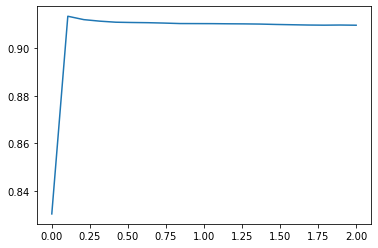

In [15]:
#Get Best C
c_s = np.linspace(1e-100,2,20)
scores = []
for i in tqdm(c_s):
    svm_t = sk.svm.LinearSVC(C=i,fit_intercept=False)
    svm_t.fit(bag_of_words_train,y_train)
    scores.append(svm_t.score(bag_of_words_test,y_test))
plt.plot(c_s,scores)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:12<00:00,  1.67it/s]


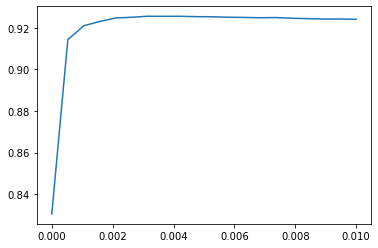

In [16]:
#Проверим интервал 0 - 0.25 и так далее
c_s_2 = np.linspace(1e-100,0.01,20)
scores_2 = []
for i in tqdm(c_s_2):
    svm_t = sk.svm.LinearSVC(C=i,fit_intercept=False)
    svm_t.fit(bag_of_words_train,y_train)
    scores_2.append(svm_t.score(bag_of_words_test,y_test))
plt.plot(c_s_2,scores_2)

Подберите важность суммы нарушений C, чтобы SVM работала лучше всего (подобрал - 0.004)

Выведите на экран 20 слов, которые больше всего голосуют за позитивность отзыва и 20 — за негативность вместе с соответствующими им коэффициентами натренированной линейной функции:
```python
ind = np.argsort(SVM.coef_[0])
for i in range(20):
    print(SVM.coef_[0][ind[i]], vocabulary[ind[i]])
print("\n")
for i in range(20):
    print(SVM.coef_[0][ind[-i-1]], vocabulary[ind[-i-1]]) 
```

In [17]:
#Final SVM
SVM = sk.svm.LinearSVC(C=0.004,fit_intercept=False)
SVM.fit(bag_of_words_train,y_train)
ind = np.argsort(SVM.coef_[0])
for i in range(20):
    print(SVM.coef_[0][ind[i]], vocabulary[ind[i]])
print("\n")
for i in range(20):
    print(SVM.coef_[0][ind[-i-1]], vocabulary[ind[-i-1]]) 
print(SVM.score(bag_of_words_test,y_test))

-0.3006851082509716 разочарование
-0.26218549344994413 увы
-0.25178485147555685 скучно
-0.2433768600878343 скучный
-0.2414591835420065 провал
-0.21795483366149734 никакой
-0.1985047139723142 отсутствует
-0.19257467116255725 единственное
-0.18991329219246242 неприятно
-0.18300832532143876 надеялся
-0.18088570611150012 досмотреть
-0.18030809770129802 понимаю
-0.17800685105326472 извините
-0.17717640284544975 верю
-0.17669319151813473 скучен
-0.17617367368716852 разочарована
-0.173899430567047 ужасен
-0.17171901285662247 неужели
-0.17050764405304714 никакого
-0.16813690962589503 бред


0.21362682400852837 отличный
0.18769517114540638 великолепно
0.18475613856401857 фильм
0.17787348989800755 придраться
0.17468425867507326 отличная
0.17002955237991876 браво
0.16898260683748614 лучших
0.16845192731992165 приятно
0.1610104680107488 потрясающий
0.15953589819057462 потрясающе
0.1575199911015968 замечательный
0.15591857610961923 хорош
0.15205567434847442 прекрасен
0.15205464565627033 оторваться


Какой коэффициент соответствует словам: 'критика', 'странно', 'понимаю', 'деньги', 'даже' и еще 5 ваших слов по выбору. За что они голосуют: позитивность или негативность отзыва?

In [18]:
print(SVM.coef_[0][vocabulary.index('критика')],'критика') #Голосует за позитивность
print(SVM.coef_[0][vocabulary.index('странно')],'странно') #Голосует за позитивность
print(SVM.coef_[0][vocabulary.index('понимаю')] , 'понимаю') #Голосует за негативность
print(SVM.coef_[0][vocabulary.index('деньги')],'деньги') #Голосует за негативность
#print(SVM.coef_[0][vocabulary.index('даже')]) # A даже тут нет!

0.001617901134891899 критика
0.04919333093367739 странно
-0.18030809770129802 понимаю
-0.08009715747467905 деньги


Вычислите выступы, найдите и выведете на экран отзывы с минимальным и максимальным выступом, величину выступа, величину предсказания и сентиментность отзыва. Объясните в комментариях, почему найденный отзыв имеет такой маленький выступ, а другой найденный — такой большой:
```python
prediction = SVM.decision_function(bagOfWordsTest)
margins = np.multiply(prediction, data.loc[50000:]['Sentiment'].as_matrix()) #Deprecated since 0.23! Use .values!
ind = np.argsort(margins)
i = ind[-1] + 50000
print('Величина выступа = ', margins[ind[-1]])
print('Величина предсказания = ', prediction[ind[-1]])
print('Сентиментность отзыва = ', data.loc[i,'Sentiment'])
print('\n')
print(data.loc[i,'Text'])
print("\n")
i = ind[0] + 50000
print('Величина выступа = ', margins[ind[0]])
print('Величина предсказания = ', prediction[ind[0]])
print('Сентиментность отзыва = ', data.loc[i,'Sentiment'])
print('\n')
print(data.loc[i,'Text'])
```

Для объяснения отступов вам возможно пригодится код, который печатает коэффициенты w<sub>i</sub> линейной функции, значения соответствующих признаков и соответствующие слова. И все это делается в порядке убывания модуля произведения w<sub>i</sub>x<sub>i</sub>:
```python
k = ind[0]
ind2 = np.argsort(np.abs(np.multiply(SVM.coef_[0], bagOfWordsTest[k].todense()))).reshape(-1,1)
s = 0
for i in range((bagOfWordsTest[k]!=0).sum()):
    ii = ind2[-i-1].item()
    print('wi='+str(SVM.coef_[0][ii]), 'xi='+str(bagOfWordsTest[k,ii]),  vocabulary[ii])
    s += SVM.coef_[0][ii]*bagOfWordsTest[k,ii]
print('Проверка:',s) 
```

In [19]:
prediction = SVM.decision_function(bag_of_words_test)
margins = np.multiply(prediction, data_new.loc[50000:]['Sentiment'].values)
ind = np.argsort(margins)
i = ind[-1] + 50000
print('Величина выступа = ', margins[ind[-1]])
print('Величина предсказания = ', prediction[ind[-1]])
print('Сентиментность отзыва = ', data.loc[i,'Sentiment'])
print('\n')
print(data.loc[i,'Text'])
print("\n")
i = ind[0] + 50000
print('Величина выступа = ', margins[ind[0]])
print('Величина предсказания = ', prediction[ind[0]])
print('Сентиментность отзыва = ', data.loc[i,'Sentiment'])
print('\n')
print(data.loc[i,'Text'])

Величина выступа =  6.427804119033754
Величина предсказания =  6.427804119033754
Сентиментность отзыва =  1


Чудесно! Великолепно! Потрясающе! Ярко! Динамично! Захватывающе! Невероятно! Свежо! Вдохновляюще! Незабываемо! Волшебно! Сказочно! И все это о данной картине... Только из кинотеатра, эмоции одолевают, но все же надо собратся и сказать, почему каждому следует ознакомиться с «Иллюзией обмана»... На что в первую очередь обращает свое внимание зритель? Правильно, на актеров. В этом плане Джесси Айзенберг и Вуди Харрельсон полностью перетягиваю канат на себя. Не отрицаю, у каждого из «великолепной четверки» есть собственная изюминка, но именно образы картежника и гипнотизера запоминаются. Быть может, это из-за их своеобразного соперничества, или же виной этому искрометный юмор, определенная доля наглости и, конечно же, потрясающий талант, но перед этими исполнителями преклоняюсь. Чуть позже в сюжет вплетается и герой Марка Руффало. Он - полная противоположность известных всадников, 

In [20]:
k = ind[0]
ind2 = np.argsort(np.abs(np.multiply(SVM.coef_[0], bag_of_words_test[k].todense()))).reshape(-1,1)
s = 0
for i in range((bag_of_words_test[k]!=0).sum()):
    ii = ind2[-i-1].item()
    print('wi='+str(SVM.coef_[0][ii]), 'xi='+str(bag_of_words_test[k,ii]),  vocabulary[ii])
    s += SVM.coef_[0][ii]*bag_of_words_test[k,ii]
print('Проверка:',s) 

wi=-0.26218549344994413 xi=1 увы
wi=-0.1985047139723142 xi=1 отсутствует
wi=0.18475613856401857 xi=1 фильм
wi=-0.16813690962589503 xi=1 бред
wi=-0.15465275118058666 xi=1 видимо
wi=-0.1444006271520502 xi=1 неинтересно
wi=-0.13452675913065426 xi=1 плюсы
wi=-0.13398918077739783 xi=1 абсолютно
wi=0.13330890279299512 xi=1 очень
wi=0.12213574176640611 xi=1 великолепен
wi=-0.11744022344758846 xi=1 вместо
wi=-0.1153376037096924 xi=1 решили
wi=-0.11509640592074756 xi=1 никак
wi=-0.11463776269195916 xi=1 должна
wi=-0.11266329469322776 xi=1 совершенно
wi=0.11206587820163094 xi=1 жизнь
wi=0.10809183252436987 xi=1 это
wi=-0.10754708009310372 xi=1 сего
wi=0.10532866857980862 xi=1 отдельное
wi=-0.10511319116179701 xi=1 ах
wi=-0.1033125007223398 xi=1 жаль
wi=-0.09908775424941914 xi=1 сплошная
wi=-0.09844338998201632 xi=1 девочки
wi=-0.09777776566289179 xi=1 творение
wi=-0.09564785286558397 xi=1 ужас
wi=-0.09342886522504738 xi=1 превратился
wi=-0.0924991621281642 xi=1 пусто
wi=-0.08950854733073375 xi=1

wi=-0.004256443653976351 xi=1 понять
wi=0.004122039672093735 xi=1 нечто
wi=-0.004098252320321621 xi=1 вынуждены
wi=0.00399959763028813 xi=1 свои
wi=0.0038770556664805634 xi=1 доступных
wi=0.003703035677450896 xi=1 третья
wi=-0.003633507421307634 xi=1 третьей
wi=-0.0036119386036223963 xi=1 книжные
wi=0.003545405054988155 xi=1 дергается
wi=-0.003444173549417393 xi=1 которой
wi=0.0034159628431862724 xi=1 рецензии
wi=-0.0032556147419112794 xi=1 семейка
wi=-0.0030690895849783155 xi=1 камера
wi=-0.0030336267664636332 xi=1 погружая
wi=-0.0027541965742790848 xi=1 заинтересоваться
wi=0.00244020454637546 xi=1 окружения
wi=-0.0022579462257475316 xi=1 бытует
wi=-0.002235765349894177 xi=1 отменно
wi=0.002089374710218191 xi=1 знаете
wi=-0.002087745914226044 xi=1 полки
wi=-0.002041704155029972 xi=1 лет
wi=0.002015488304198177 xi=1 последующего
wi=0.0016448332005914452 xi=1 время
wi=0.001606321896647564 xi=1 горные
wi=-0.001520740740050344 xi=1 обычное
wi=0.0015147484271478768 xi=1 итого
wi=-0.0014513

Нормализуйте признаки перед разбиением выборки на Train и Test так, чтобы вместо 0/1 стояли частоты употребления слов, деленные на длину отзыва. Подберите наилучшую константу C и опишите, как изменятся отзывы с минимальным и максимальным выступом? Что лучше: не нормализованные или нормализованные признаки? Почему?

Нужно установить binary = False в CountVectorizer и добавить после fit_transform
```python
bagOfWords = preprocessing.normalize(bagOfWords, norm='l1')
```

In [21]:
bag_of_words_2 = sk.preprocessing.normalize(bag_of_words, norm='l1')
bag_of_words_train = bag_of_words_2[:50000]
y_train = data_new['Sentiment'][:50000]
bag_of_words_test = bag_of_words_2[50000:]
y_test = data_new['Sentiment'][50000:]


In [22]:
#Normalized bag of words
#SVM
SVM = sk.svm.LinearSVC(C=0.004,fit_intercept=False)
SVM.fit(bag_of_words_train,y_train)
ind = np.argsort(SVM.coef_[0])
for i in range(20):
    print(SVM.coef_[0][ind[i]], vocabulary[ind[i]])
print("\n")
for i in range(20):
    print(SVM.coef_[0][ind[-i-1]], vocabulary[ind[-i-1]]) 

-0.010193574889563132 разочарование
-0.00998422117710414 бред
-0.007571675107205102 скучный
-0.007330680281265166 провал
-0.005434316050341854 бездарно
-0.0052522924340965525 чушь
-0.0047772748102845085 неинтересно
-0.004745887322527692 тратьте
-0.00454351264022467 никакой
-0.004519981306342646 ноль
-0.004421187398102087 неинтересный
-0.004108989202832778 отвратительно
-0.004051247464862413 отсутствует
-0.0037783826335518905 плоский
-0.0037415709946804696 убого
-0.003725271024698334 ужасен
-0.0036453040073037442 худших
-0.003436628177061861 противно
-0.0033671661391013775 неубедительно
-0.003334953017697368 непонятно


1.4794929009954325 фильм
1.4022413293768643 это
1.0663115379725603 очень
0.8180109583564646 фильма
0.796035395930817 просто
0.619116251005922 который
0.5952582644897839 фильме
0.5459922805793278 жизни
0.507011958712388 которые
0.5061528007805609 кино
0.49451250882380055 время
0.4729965316478647 именно
0.4599317057534073 своей
0.45576859459751273 жизнь
0.4512907785942135 

In [23]:
prediction = SVM.decision_function(bag_of_words_test)
margins = np.multiply(prediction, data_new.loc[50000:]['Sentiment'].values)
ind = np.argsort(margins)
i = ind[-1] + 50000
print('Величина выступа = ', margins[ind[-1]])
print('Величина предсказания = ', prediction[ind[-1]])
print('Сентиментность отзыва = ', data.loc[i,'Sentiment'])
print('\n')
print(data.loc[i,'Text'])
print("\n")
i = ind[0] + 50000
print('Величина выступа = ', margins[ind[0]])
print('Величина предсказания = ', prediction[ind[0]])
print('Сентиментность отзыва = ', data.loc[i,'Sentiment'])
print('\n')
print(data.loc[i,'Text'])

Величина выступа =  0.5061493903425465
Величина предсказания =  0.5061493903425465
Сентиментность отзыва =  1


Действительно хороший фильм. Очень жестокий и реалистичный.


Величина выступа =  -0.31603360581894097
Величина предсказания =  0.31603360581894097
Сентиментность отзыва =  -1


До других пирогов ему далеко. Очень низкого качества фильм. Помоему его даже в кинотеатрах не показывали.


In [24]:
SVM.score(bag_of_words_test,y_test)

0.83048

In [ ]:
c_s = np.linspace(60,100,50)
scores = []
for i in tqdm(c_s):
    svm_t = sk.svm.LinearSVC(C=i,fit_intercept=False)
    svm_t.fit(bag_of_words_train,y_train)
    scores.append(svm_t.score(bag_of_words_test,y_test))
plt.plot(c_s,scores)

 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [00:37<00:05,  1.07it/s]